## Worksheet 7


### Linear Prediction Models - Money Ball!

### Due on 6/14/23 @ 11:55 pm EST (see Assignment Folder in Sakai)

## Authorized help and collaboration rules

You **may not** collaborate with friends or teammates. You **may** use your notes, class provided resources (e.g., web links, notebooks,videos, slides) to help you solve the problems below. For effective learning, you should try to complete the worksheet on your own before looking for help. 

If you have any questions regarding what is, or is not, authorized you must ask. Saying after the fact you didn't understand, or were not sure, is not a valid excuse.

## Honor pledge

I pledge the COMP 116 honor code.

To the acknowledgethe **authororized help and collaboration rules** please edit the Markdown below and enter the requested information.

```
Onyen = mllandon
Author = Matthew Landon
PID = 730461081
```

## Python version check

After running the next cell you should be running Python version `3.7.0` or later.

In [2]:
import sys
print(sys.version)

3.10.9 | packaged by Anaconda, Inc. | (main, Mar  1 2023, 18:18:15) [MSC v.1916 64 bit (AMD64)]


## Python modules

In [3]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd 
from sklearn import linear_model
from sklearn.metrics import mean_absolute_error, r2_score

### Baseball Data

<a href="https://www.kaggle.com/open-source-sports/baseball-databank">Baseball Databank</a> is a compilation of historical baseball data in a convenient, tidy format, distributed under Open Data terms. In this worksheet we are specifically looking at team statistics (provided below) between 1961 and 2015.

Team Statistics.
- year
- team name
- games played
- wins
- losses
- runs scored
- at bats
- hits
- doubles
- triples
- homeruns
- walks
- strikeouts
- stolen bases
- earned runs allowed
- complete games
- hits allowed
- homeruns allowed

In [4]:
teams_df = pd.read_csv("teams.csv")
teams_df[teams_df["wins"]>=50]

,year,team name,games played,wins,losses,runs scored,at bats,hits,doubles,triples,homeruns,walks,strikeouts,stolen bases,earned runs allowed,complete games,hits allowed,homeruns allowed
0,1961,Baltimore Orioles,163,95,67,691,5481,1393,227,36,149,581,902,39,526,54,1226,109
1,1961,Boston Red Sox,163,76,86,729,5508,1401,251,37,112,647,847,56,687,35,1472,167
2,1961,Chicago White Sox,163,86,76,765,5556,1475,216,46,138,550,612,100,653,39,1491,158
3,1961,Chicago Cubs,156,64,90,689,5344,1364,238,51,176,539,1027,35,689,34,1492,165
4,1961,Cincinnati Reds,154,93,61,710,5243,1414,247,35,158,423,761,70,575,46,1300,147
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1441,2015,Los Angeles Dodgers,162,92,70,667,5385,1346,263,26,187,563,1258,59,553,6,1317,145
1442,2015,San Francisco Giants,162,84,78,696,5565,1486,288,39,136,457,1159,93,597,7,1344,155
1443,2015,Arizona Diamondbacks,162,79,83,720,5649,1494,289,48,154,490,1312,132,659,1,1450,182
1444,2015,San Diego Padres,162,74,88,650,5457,1324,260,36,148,426,1327,82,655,1,1371,171


****

### Question 1: Visualizing Win Data Correlation  (5 Points)

<img src="w7_q1_plot.png" width="550" style="float: right"/>

Create a combined plot that visualizes ``Wins vs Strikeouts``, ``Wins vs Runs Scored``, ``Wins vs Homeruns``, and ``Wins vs Homeruns allowed`` for teams that had $\ge 50$ wins between 1990 and 2015 (inclusive).

To recieve full credit your plotting solution must use:
1. the data provided in the **team_df** dataframe,
2. the <a href="https://matplotlib.org/">Matplotlib</a> Python library (i.e., **do not** use Panda plotting capabilities), and 
3. create a plotting solution that is **visually identical** to the `plot shown on the right`. 

You may assume:
- The colors used to generate plots are blue, red, magenta, and green
- The figsize=(12,12)
- The minimum y-axis tick value is 50 and the maximum y-axis tick value is 120 (increments of 10)
- Use the default x-axis tick values (i.e., nothing needs to be done)

Hints:
- Dataframe <a href="https://pandas.pydata.org/docs/user_guide/indexing.html">Selecting, Slicing, and Extracting</a> 
- Matplotlib <a href="https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.yticks.html">yticks</a>
- Matplotlib <a href="https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.subplot.html">subplot</a>
- Matplotlib <a href="https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.text.html">text</a>



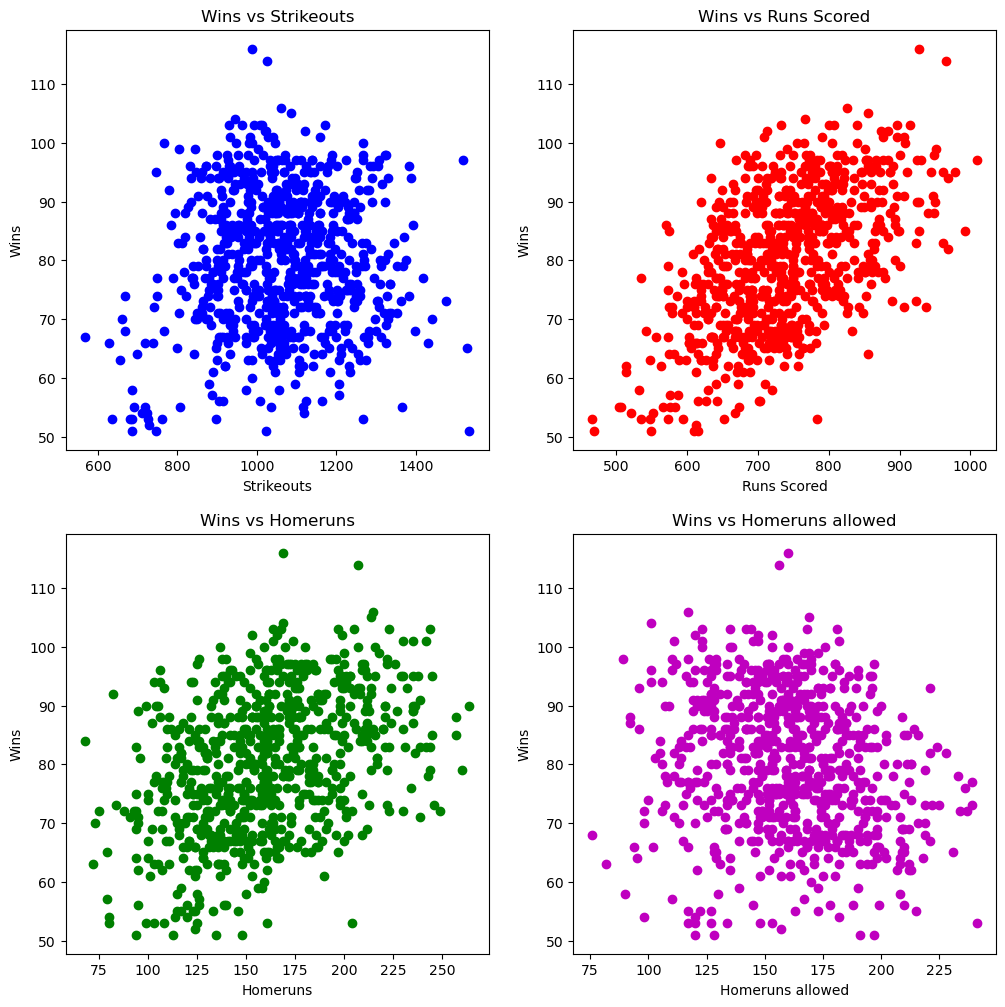

In [41]:
# -------------------------------------
# Your plotting solution
# -------------------------------------

Sdf = teams_df[(teams_df["year"].between(1990,2015)) & (teams_df["wins"]>=50)]

plt.figure(figsize=(12,12))
plt.subplot(221)
plt.title("Wins vs Strikeouts")
plt.plot("strikeouts","wins", "bo", data=Sdf)
plt.yticks(np.arange(50,120,10))
plt.xlabel("Strikeouts")
plt.ylabel("Wins")
plt.subplot(222)
plt.title("Wins vs Runs Scored")
plt.plot("runs scored","wins", "ro", data=Sdf)
plt.yticks(np.arange(50,120,10))
plt.xlabel("Runs Scored")
plt.ylabel("Wins")
plt.subplot(223)
plt.title("Wins vs Homeruns")
plt.plot("homeruns","wins", "go", data=Sdf)
plt.yticks(np.arange(50,120,10))
plt.xlabel("Homeruns")
plt.ylabel("Wins")
plt.subplot(224)
plt.title("Wins vs Homeruns allowed")
plt.plot("homeruns allowed","wins", "mo", data=Sdf)
plt.yticks(np.arange(50,120,10))
plt.xlabel("Homeruns allowed")
plt.ylabel("Wins")
plt.show()

*****

### Question 2: Variables that Influence Total Number of Wins (5 points)

<img src="w7_q2_plot.png" width="550" style="float: right"/>

Create a combined plot that visualizes the fit of the linear regression models below for teams that had $\ge 50$ wins between 1990 and 2015 (inclusive).
- ``Wins vs Strikeouts`` (strikeouts is the independent variable), 
- ``Wins vs Runs Scored`` (runs scored is the independent variable), 
- ``Wins vs Homeruns`` (homeruns is the independent variable), and 
- ``Wins vs Homeruns allowed`` (homeruns allowed is the independent variable).

To recieve full credit your plotting solution must use:
1. the data provided in the **team_df** dataframe,
2. the <a href="https://matplotlib.org/">Matplotlib</a> Python library (i.e., **do not** use Panda plotting capabilities), and 
3. create a plotting solution that is **visually identical** to the `plot shown on the right`. 

You may assume:
- The colors used to generate plots are blue, red, magenta, and green.
- The color of the regression line is black.
- The figsize=(12,12)
- The minimum y-axis tick value is 50 and the maximum y-axis tick value is 120 (increments of 10).
- Use the default x-axis tick values (i.e., nothing needs to be done).
- When drawing the regression line, it starts at the minimum dependent variable value and ends at the maximum dependent variable value.
- Text that displays the $r^2$ and MAE is in the upper right corner (both values rounded to two decimal places).
- Text bounding box (bbox) is set to `dict(boxstyle="round", facecolor="wheat" )`

Hints:
- Dataframe <a href="https://pandas.pydata.org/docs/user_guide/indexing.html">Selecting, Slicing, and Extracting</a> 
- Matplotlib <a href="https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.yticks.html">yticks</a>
- Matplotlib <a href="https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.subplot.html">subplot</a>
- Matplotlib <a href="https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.text.html">text</a>
- Sklearn <a href="https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html">linear regression model</a>
- Sklearn <a href="https://scikit-learn.org/stable/modules/generated/sklearn.metrics.r2_score.html">r2_score</a>
- Sklearn <a href="https://scikit-learn.org/stable/modules/generated/sklearn.metrics.mean_absolute_error.html">mean_absolute_error</a>

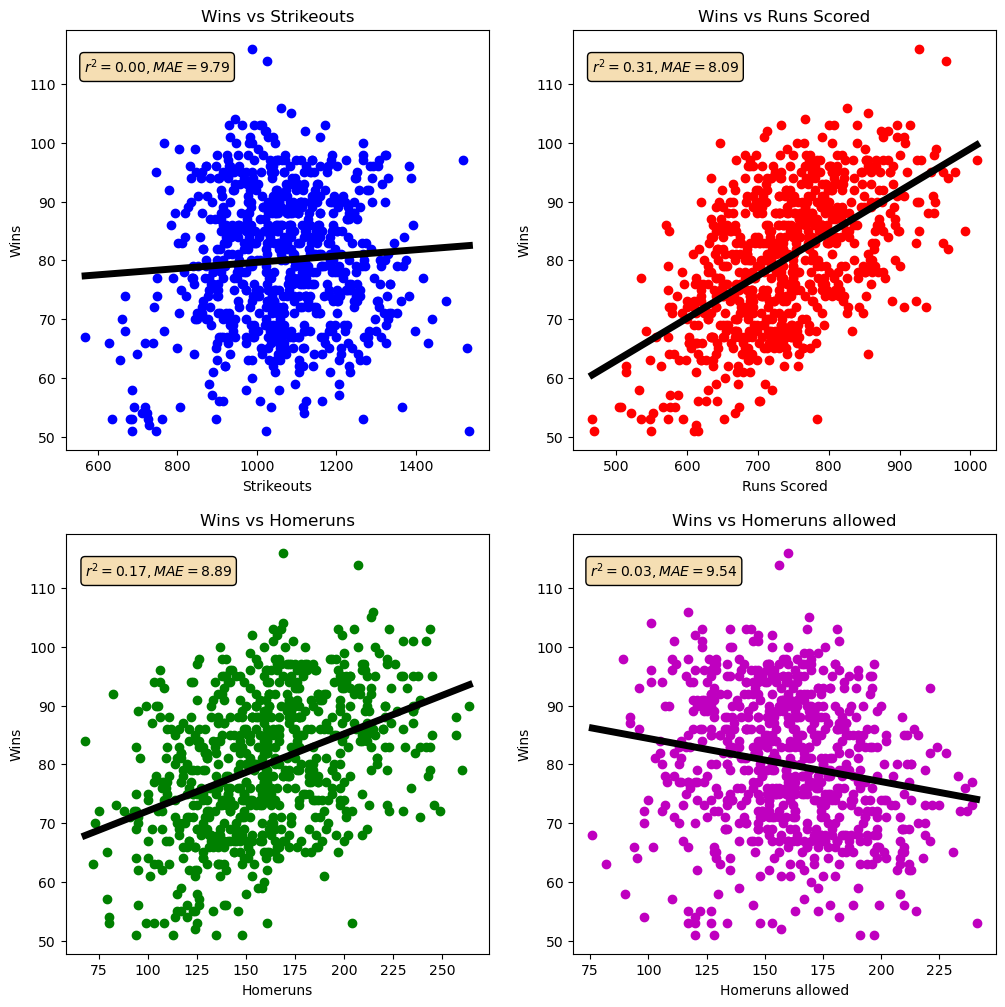

In [53]:
# -------------------------------------
# Your plotting solution
# -------------------------------------
Sdf = teams_df[(teams_df["year"].between(1990,2015)) & (teams_df["wins"]>=50)]
regression_model = linear_model.LinearRegression()

plt.figure(figsize=(12,12))

plt.subplot(221)
plt.title("Wins vs Strikeouts")
plt.plot("strikeouts","wins", "bo", data=Sdf)
plt.xlabel("Strikeouts")
plt.ylabel("Wins")
plt.yticks(np.arange(50,120,10))

regression_model.fit(Sdf[["strikeouts"]], Sdf["wins"] )
y_hat = regression_model.predict( Sdf[["strikeouts"]] )
ticks = np.arange(Sdf["strikeouts"].min(),Sdf["strikeouts"].max(), 0.05 )
reg_line = (ticks*regression_model.coef_ ) + regression_model.intercept_
plt.plot(ticks,reg_line.reshape(-1,1), 'k-', lw=5 )
plt.text(565,112,"$r^2={0:.2f}, MAE={1:0.2f}$".format( r2_score( Sdf["wins"], y_hat ), mean_absolute_error( Sdf["wins"], y_hat ) ),
          bbox=dict( boxstyle='round', facecolor='wheat' ))

plt.subplot(222)
plt.title("Wins vs Runs Scored")
plt.plot("runs scored","wins", "ro", data=Sdf)
plt.xlabel("Runs Scored")
plt.ylabel("Wins")
plt.yticks(np.arange(50,120,10))

regression_model.fit(Sdf[["runs scored"]], Sdf["wins"] )
y_hat = regression_model.predict( Sdf[["runs scored"]] )
ticks = np.arange(Sdf["runs scored"].min(),Sdf["runs scored"].max(), 0.05 )
reg_line = (ticks*regression_model.coef_ ) + regression_model.intercept_
plt.plot(ticks,reg_line.reshape(-1,1), 'k-', lw=5 )
plt.text( 465, 112, "$r^2={0:.2f}, MAE={1:0.2f}$".format( r2_score( Sdf["wins"], y_hat ), mean_absolute_error( Sdf["wins"], y_hat ) ),
          bbox=dict( boxstyle='round', facecolor='wheat' ) )

plt.subplot(223)
plt.title("Wins vs Homeruns")
plt.plot("homeruns","wins", "go", data=Sdf)
plt.xlabel("Homeruns")
plt.ylabel("Wins")
plt.yticks(np.arange(50,120,10))

regression_model.fit(Sdf[["homeruns"]], Sdf["wins"] )
y_hat = regression_model.predict( Sdf[["homeruns"]] )
ticks = np.arange(Sdf["homeruns"].min(),Sdf["homeruns"].max(), 0.05 )
reg_line = (ticks*regression_model.coef_ ) + regression_model.intercept_
plt.plot(ticks,reg_line.reshape(-1,1), 'k-', lw=5 )
plt.text( 68, 112, "$r^2={0:.2f}, MAE={1:0.2f}$".format( r2_score( Sdf["wins"], y_hat ), mean_absolute_error( Sdf["wins"], y_hat ) ),
          bbox=dict( boxstyle='round', facecolor='wheat' ) )

plt.subplot(224)
plt.title("Wins vs Homeruns allowed")
plt.plot("homeruns allowed","wins", "mo", data=Sdf)
plt.xlabel("Homeruns allowed")
plt.ylabel("Wins")
plt.yticks(np.arange(50,120,10))

regression_model.fit(Sdf[["homeruns allowed"]], Sdf["wins"] )
y_hat = regression_model.predict( Sdf[["homeruns allowed"]] )
ticks = np.arange(Sdf["homeruns allowed"].min(),Sdf["homeruns allowed"].max(), 0.05 )
reg_line = (ticks*regression_model.coef_ ) + regression_model.intercept_
plt.plot(ticks,reg_line.reshape(-1,1), 'k-', lw=5 )
plt.text( 75, 112, "$r^2={0:.2f}, MAE={1:0.2f}$".format( r2_score( Sdf["wins"], y_hat ), mean_absolute_error( Sdf["wins"], y_hat ) ),
          bbox=dict( boxstyle='round', facecolor='wheat' ) )

plt.show()

*****

### Question 3: Visualizing Loss Data Correlation  (5 Points)

<img src="w7_q3_plot.png" width="550" style="float: right"/>

In the coding cell below, create a combined plot that visualizes ``Losses vs Strikeouts``, ``Losses vs Runs Scored``, ``Losses vs Homeruns``, and ``Losses vs Homeruns allowed`` for teams that had $\ge 50$ losses between 1990 and 2015 (inclusive). 

To recieve full credit your plotting solution must use:
1. the data provided in the **team_df** dataframe,
2. the <a href="https://matplotlib.org/">Matplotlib</a> Python library (i.e., **do not** use Panda plotting capabilities), and 
3. create a plotting solution that is **visually identical** to the `plot shown on the right`. 

You may assume:
- The colors used to generate plots are blue, red, magenta, and green
- The figsize=(12,12)
- The minimum y-axis tick value is 50 and the maximum y-axis tick value is 120 (increments of 10)
- Use the default x-axs tick values (i.e., nothing needs to be done)

Hints:
- Dataframe <a href="https://pandas.pydata.org/docs/user_guide/indexing.html">Selecting, Slicing, and Extracting</a> 
- Matplotlib <a href="https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.yticks.html">yticks</a>
- Matplotlib <a href="https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.subplot.html">subplot</a>
- Matplotlib <a href="https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.text.html">text</a>




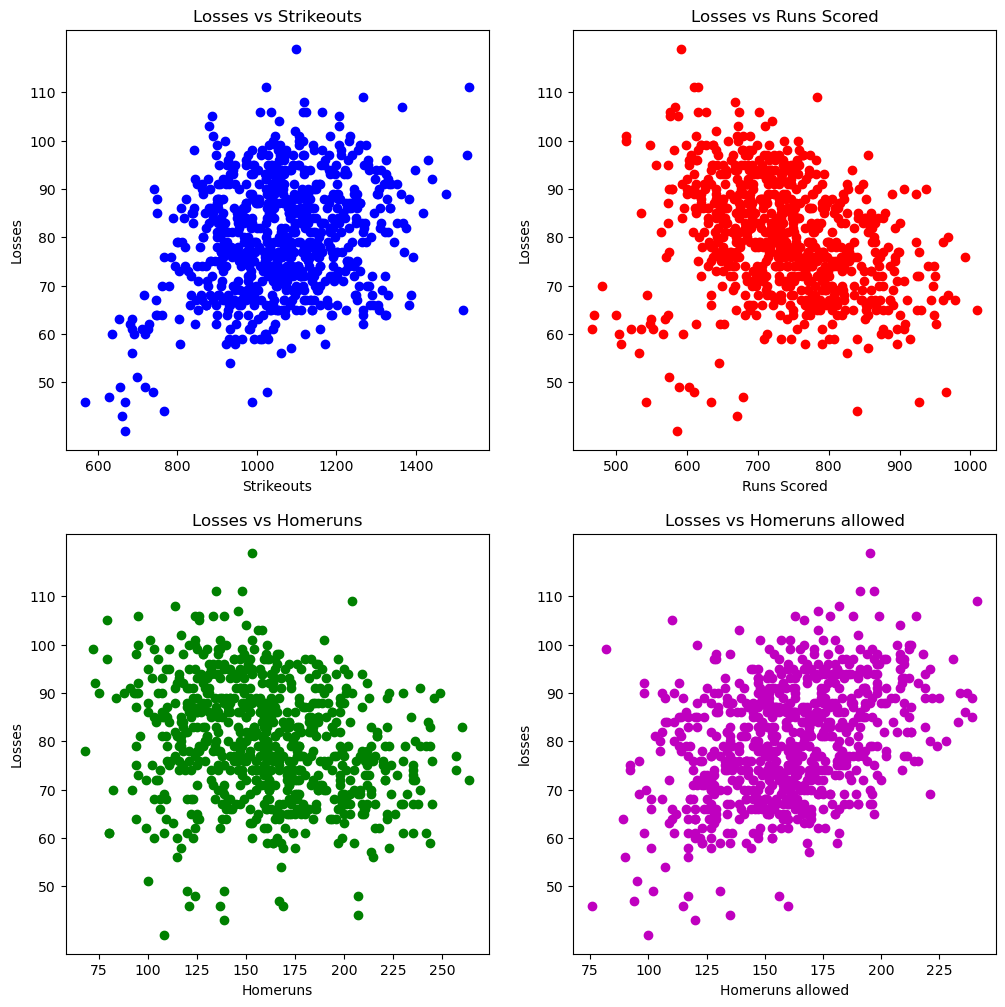

In [57]:
# -------------------------------------
# Your plotting solution
# -------------------------------------

Sdf = teams_df[(teams_df["year"].between(1990,2015)) & (teams_df["losses"]>=50)]

plt.figure(figsize=(12,12))
plt.subplot(221)
plt.title("Losses vs Strikeouts")
plt.plot("strikeouts","losses", "bo", data=Sdf)
plt.yticks(np.arange(50,120,10))
plt.xlabel("Strikeouts")
plt.ylabel("Losses")
plt.subplot(222)
plt.title("Losses vs Runs Scored")
plt.plot("runs scored","losses", "ro", data=Sdf)
plt.yticks(np.arange(50,120,10))
plt.xlabel("Runs Scored")
plt.ylabel("Losses")
plt.subplot(223)
plt.title("Losses vs Homeruns")
plt.plot("homeruns","losses", "go", data=Sdf)
plt.yticks(np.arange(50,120,10))
plt.xlabel("Homeruns")
plt.ylabel("Losses")
plt.subplot(224)
plt.title("Losses vs Homeruns allowed")
plt.plot("homeruns allowed","losses", "mo", data=Sdf)
plt.yticks(np.arange(50,120,10))
plt.xlabel("Homeruns allowed")
plt.ylabel("losses")
plt.show()



****

*****

### Question 4: Variables that Influence Total Number of Losses (5 points)

<img src="w7_q4_plot.png" width="550" style="float: right"/>

Create a combined plot that visualizes the fit of the linear regression models below for teams that had $\ge 50$ losses between 1990 and 2015 (inclusive).
- ``Losses vs Strikeouts`` (strikeouts is the independent variable), 
- ``Losses vs Runs Scored`` (runs scored is the independent variable), 
- ``Losses vs Homeruns`` (homeruns is the independent variable), and 
- ``Losses vs Homeruns allowed`` (homeruns allowed is the independent variable).

To recieve full credit your plotting solution must use:
1. the data provided in the **team_df** dataframe,
2. the <a href="https://matplotlib.org/">Matplotlib</a> Python library (i.e., **do not** use Panda plotting capabilities), and 
3. create a plotting solution that is **visually identical** to the `plot shown on the right`. 

You may assume:
- The colors used to generate plots are blue, red, magenta, and green.
- The color of the regression line is black.
- The figsize=(12,12)
- The minimum y-axis tick value is 50 and the maximum y-axis tick value is 120 (increments of 10).
- Use the default x-axis tick values (i.e., nothing needs to be done).
- When drawing the regression line, it will starts at the minimum dependent variable value and ends at the maximum dependent variable value.
- Text that displays the $r^2$ and MAE is in the upper right corner (both values rounded to two decimal places).
- Text bounding box (bbox) is set to `dict(boxstyle="round", facecolor="wheat" )`

Hints:
- Dataframe <a href="https://pandas.pydata.org/docs/user_guide/indexing.html">Selecting, Slicing, and Extracting</a> 
- Matplotlib <a href="https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.yticks.html">yticks</a>
- Matplotlib <a href="https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.subplot.html">subplot</a>
- Matplotlib <a href="https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.text.html">text</a>
- Sklearn <a href="https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html">linear regression model</a>
- Sklearn <a href="https://scikit-learn.org/stable/modules/generated/sklearn.metrics.r2_score.html">r2_score</a>
- Sklearn <a href="https://scikit-learn.org/stable/modules/generated/sklearn.metrics.mean_absolute_error.html">mean_absolute_error</a>


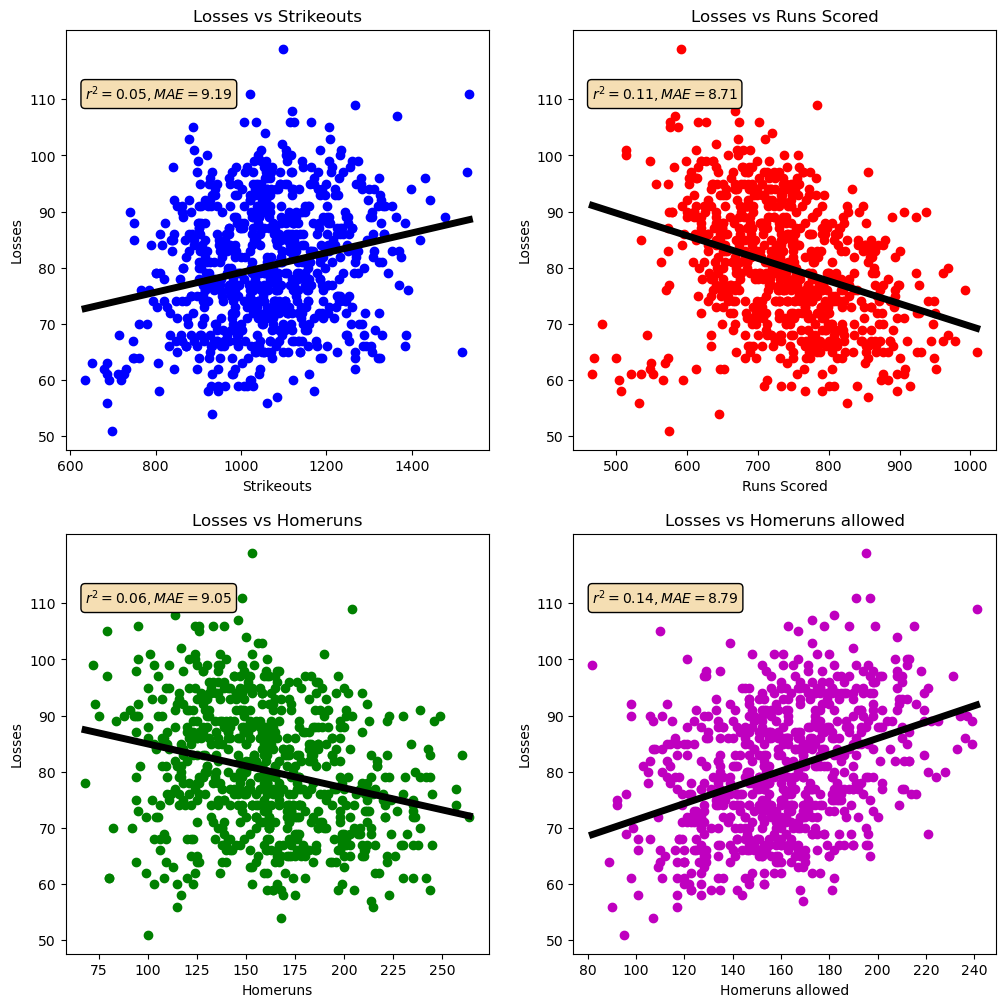

In [67]:
# -------------------------------------
# Your plotting solution
# -------------------------------------

Sdf = teams_df[(teams_df["year"].between(1990,2015)) & (teams_df["losses"]>=50)]
regression_model = linear_model.LinearRegression()

plt.figure(figsize=(12,12))

plt.subplot(221)
plt.title("Losses vs Strikeouts")
plt.plot("strikeouts","losses", "bo", data=Sdf)
plt.xlabel("Strikeouts")
plt.ylabel("Losses")
plt.yticks(np.arange(50,120,10))

regression_model.fit(Sdf[["strikeouts"]], Sdf["losses"] )
y_hat = regression_model.predict( Sdf[["strikeouts"]] )
ticks = np.arange(Sdf["strikeouts"].min(),Sdf["strikeouts"].max(), 0.05 )
reg_line = (ticks*regression_model.coef_ ) + regression_model.intercept_
plt.plot(ticks,reg_line.reshape(-1,1), 'k-', lw=5 )
plt.text( 635, 110, "$r^2={0:.2f}, MAE={1:0.2f}$".format( r2_score( Sdf["losses"], y_hat ), mean_absolute_error( Sdf["losses"], y_hat ) ),
          bbox=dict( boxstyle='round', facecolor='wheat' ) )

plt.subplot(222)
plt.title("Losses vs Runs Scored")
plt.plot("runs scored","losses", "ro", data=Sdf)
plt.xlabel("Runs Scored")
plt.ylabel("Losses")
plt.yticks(np.arange(50,120,10))

regression_model.fit(Sdf[["runs scored"]], Sdf["losses"] )
y_hat = regression_model.predict( Sdf[["runs scored"]] )
ticks = np.arange(Sdf["runs scored"].min(),Sdf["runs scored"].max(), 0.05 )
reg_line = (ticks*regression_model.coef_ ) + regression_model.intercept_
plt.plot(ticks,reg_line.reshape(-1,1), 'k-', lw=5 )
plt.text( 465, 110, "$r^2={0:.2f}, MAE={1:0.2f}$".format( r2_score( Sdf["losses"], y_hat ), mean_absolute_error( Sdf["losses"], y_hat ) ),
          bbox=dict( boxstyle='round', facecolor='wheat' ) )

plt.subplot(223)
plt.title("Losses vs Homeruns")
plt.plot("homeruns","losses", "go", data=Sdf)
plt.xlabel("Homeruns")
plt.ylabel("Losses")
plt.yticks(np.arange(50,120,10))

regression_model.fit(Sdf[["homeruns"]], Sdf["losses"] )
y_hat = regression_model.predict( Sdf[["homeruns"]] )
ticks = np.arange(Sdf["homeruns"].min(),Sdf["homeruns"].max(), 0.05 )
reg_line = (ticks*regression_model.coef_ ) + regression_model.intercept_
plt.plot(ticks,reg_line.reshape(-1,1), 'k-', lw=5 )
plt.text( 68, 110, "$r^2={0:.2f}, MAE={1:0.2f}$".format( r2_score( Sdf["losses"], y_hat ), mean_absolute_error( Sdf["losses"], y_hat ) ),
          bbox=dict( boxstyle='round', facecolor='wheat' ) )

plt.subplot(224)
plt.title("Losses vs Homeruns allowed")
plt.plot("homeruns allowed","losses", "mo", data=Sdf)
plt.xlabel("Homeruns allowed")
plt.ylabel("Losses")
plt.yticks(np.arange(50,120,10))

regression_model.fit(Sdf[["homeruns allowed"]], Sdf["losses"] )
y_hat = regression_model.predict( Sdf[["homeruns allowed"]] )
ticks = np.arange(Sdf["homeruns allowed"].min(),Sdf["homeruns allowed"].max(), 0.05 )
reg_line = (ticks*regression_model.coef_ ) + regression_model.intercept_
plt.plot(ticks,reg_line.reshape(-1,1), 'k-', lw=5 )
plt.text( 82, 110, "$r^2={0:.2f}, MAE={1:0.2f}$".format( r2_score( Sdf["losses"], y_hat ), mean_absolute_error( Sdf["losses"], y_hat ) ),
          bbox=dict( boxstyle='round', facecolor='wheat' ) )

plt.show()
